In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Drop unnecessary columns
df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Glucose   768 non-null    int64  
 1   Insulin   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Pedigree  768 non-null    float64
 4   Age       768 non-null    int64  
 5   Outcome   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [4]:
# Display statistical summary of the dataset
print(df.describe().T)

               count        mean         std     min       25%       50%  \
Pregnancies    768.0    3.845052    3.369578   0.000   1.00000    3.0000   
Glucose        768.0  120.894531   31.972618   0.000  99.00000  117.0000   
BloodPressure  768.0   69.105469   19.355807   0.000  62.00000   72.0000   
SkinThickness  768.0   20.536458   15.952218   0.000   0.00000   23.0000   
Insulin        768.0   79.799479  115.244002   0.000   0.00000   30.5000   
BMI            768.0   31.992578    7.884160   0.000  27.30000   32.0000   
Pedigree       768.0    0.471876    0.331329   0.078   0.24375    0.3725   
Age            768.0   33.240885   11.760232  21.000  24.00000   29.0000   
Outcome        768.0    0.348958    0.476951   0.000   0.00000    0.0000   

                     75%     max  
Pregnancies      6.00000   17.00  
Glucose        140.25000  199.00  
BloodPressure   80.00000  122.00  
SkinThickness   32.00000   99.00  
Insulin        127.25000  846.00  
BMI             36.60000   67

In [6]:
# Impute NaN values for columns based on their distribution
# Replace zero values with NaN before imputing
df[['Glucose', 'Insulin', 'BMI']] = df[['Glucose', 'Insulin', 'BMI']].replace(0, np.NaN)


In [7]:
# Impute missing values (NaN) with mean values for each column
columns = ['Glucose', 'Insulin', 'BMI']
for col in columns:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)


C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

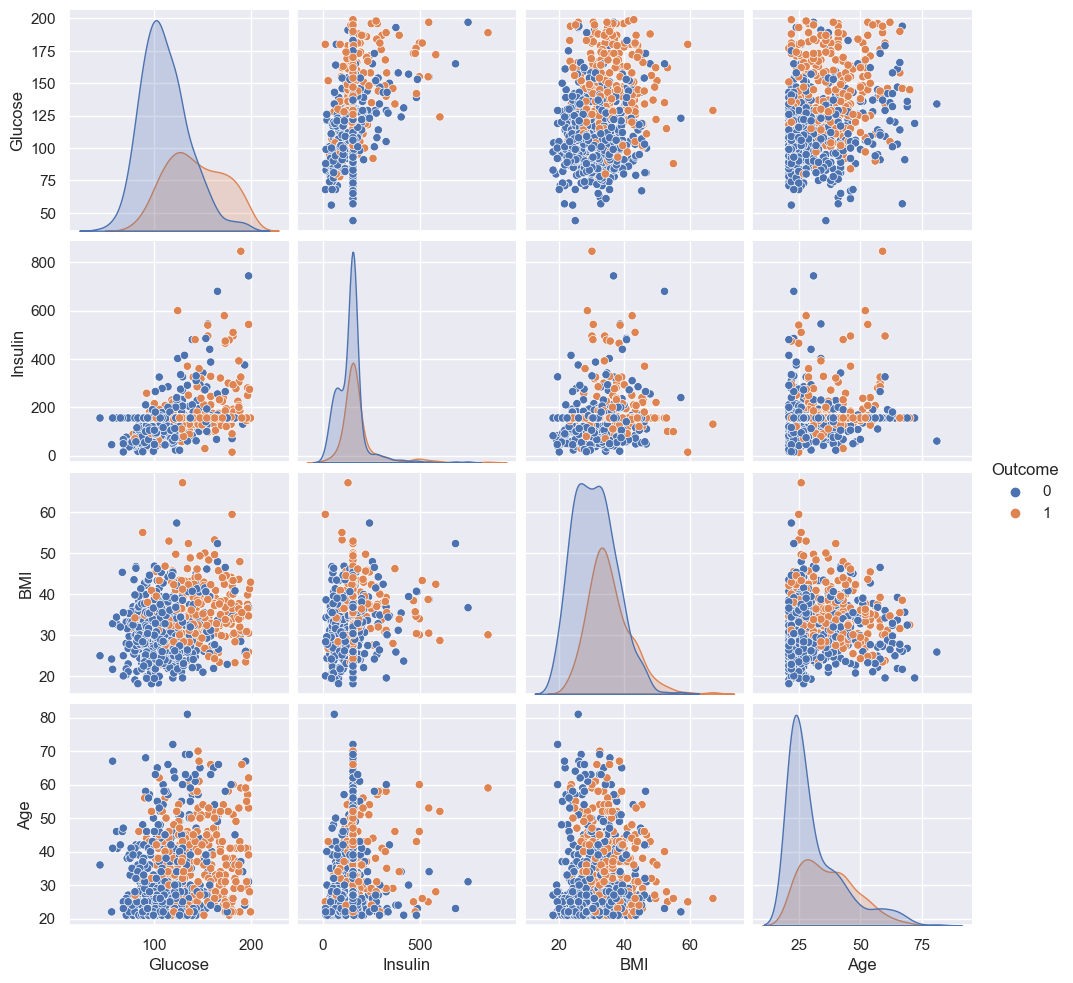

In [8]:
# Plotting graph
graph = ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
sns.set()
sns.pairplot(df[graph], hue='Outcome', diag_kind='kde')
plt.show()

In [9]:
# Separate the outcome or target column
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Implementing the K-Nearest Neighbors (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [14]:

# Predicting the results
y_pred = classifier.predict(X_test)

In [15]:
# Evaluating the model using the confusion matrix and F1-score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[93 14]
 [14 33]]
F1 Score: 0.7021276595744681
Accuracy Score: 0.8181818181818182


In [16]:
# Plotting the ROC curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


<Figure size 640x480 with 0 Axes>

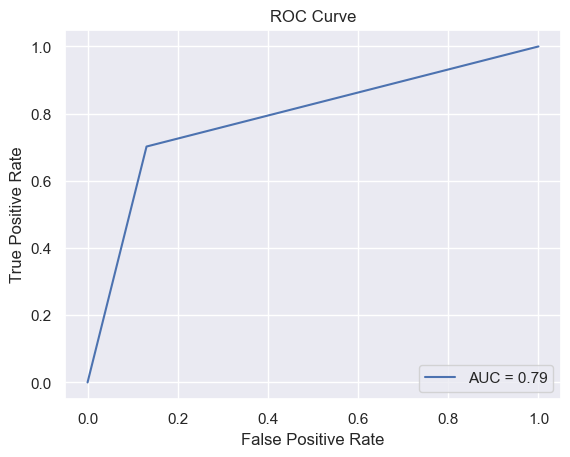

In [17]:

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()